## Урок 4. Визуальный анализ данных

### Условие 1: Задача 1
Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы



### 1.1. Скачать следующие данные: kc-house-data и laptop_price


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('kc-house-data (1) (1).csv',encoding='windows-1251')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2. Изучите стоимости недвижимости


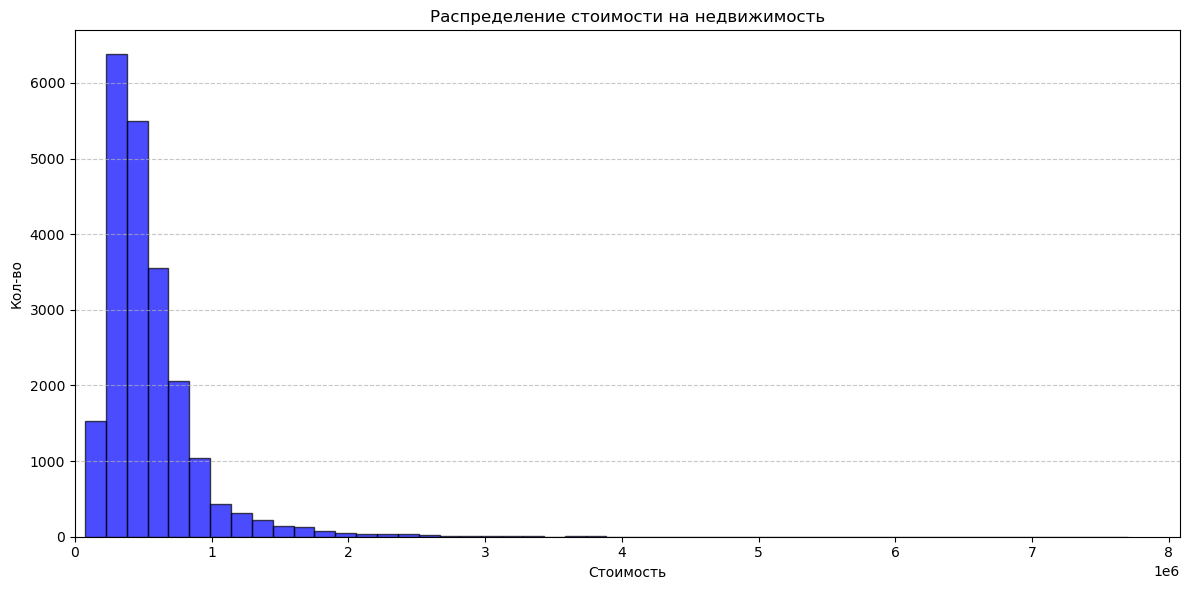

In [87]:
plt.figure(figsize=(12,6))
plt.hist(df['price'], bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Распределение стоимости на недвижимость')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во');
plt.xlim(left=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()


In [ ]:
Вывод: стоимсть примерно 0,2-0,7 - самая ходовая

### 1.3. Изучите распределение квадратуры жилой


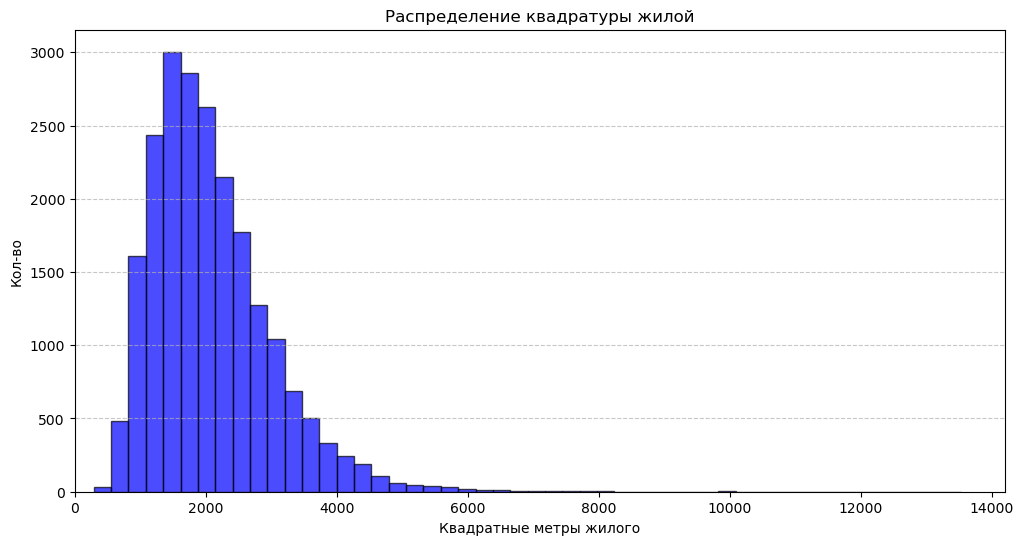

In [50]:
plt.figure(figsize=(12, 6)) 
plt.hist(df['sqft_living'], bins=50, alpha=0.7, color='blue', edgecolor='black') 
plt.title('Распределение квадратуры жилой')
plt.xlabel('Квадратные метры жилого')
plt.ylabel('Кол-во')
plt.xlim(left=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

In [ ]:
Вывод:кв.м в приделе 1000-3000 пользуются популярностью

### 1.4. Изучите распределение года постройки



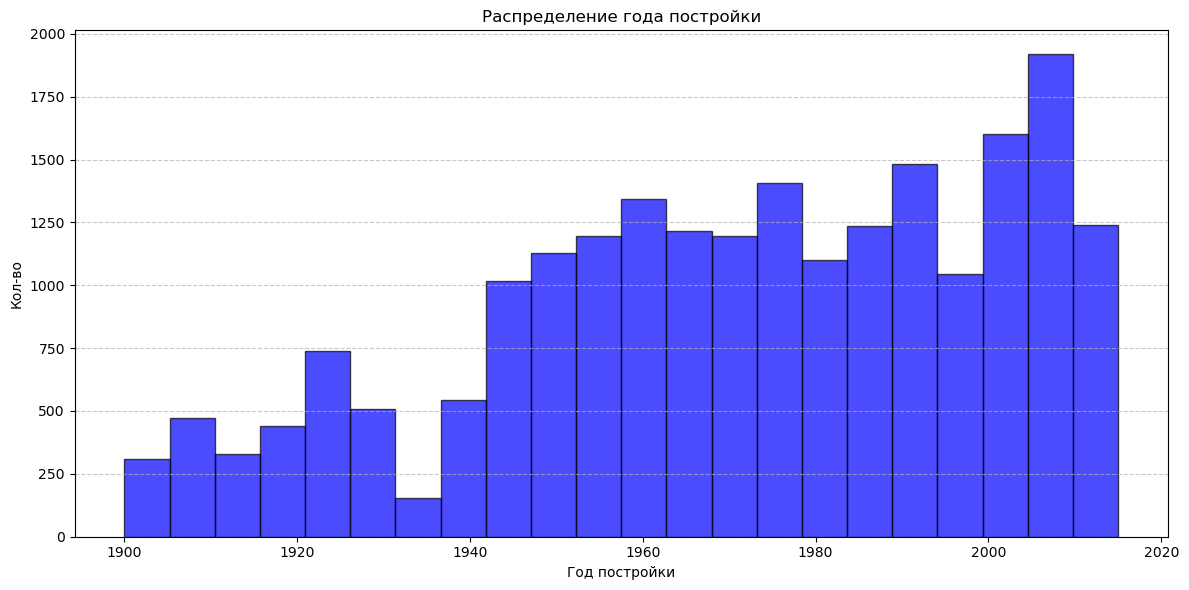

In [82]:
plt.figure(figsize=(12,6))
plt.hist(df['yr_built'], bins=22, alpha=0.7, color='blue', edgecolor='black')
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во');
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

In [ ]:
Вывод: в период с 1960 по 2010 люди массово строили дома

## Условие 2: 2 задача

### 2.1. Изучите распределение домов от наличия вида на набережную

Постройте график

Сделайте выводы



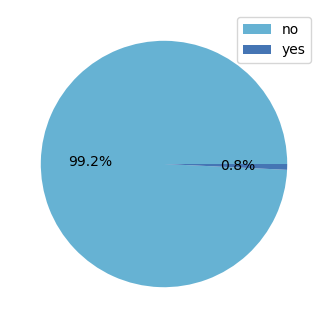

In [132]:
data = df['waterfront'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%',colors = ['#66B2D3', '#4575B4'])
plt.legend(['no', 'yes']);



In [ ]:
## P.S. может вы знаете, в процессе совершенствования,  появилась эта рамка c прокруткой

Вывод: только "привиллегированная группа" в размере 0,8% людей может наслаждаться прекрасным видом реки

### 2.2. Изучите распределение этажей домов


''

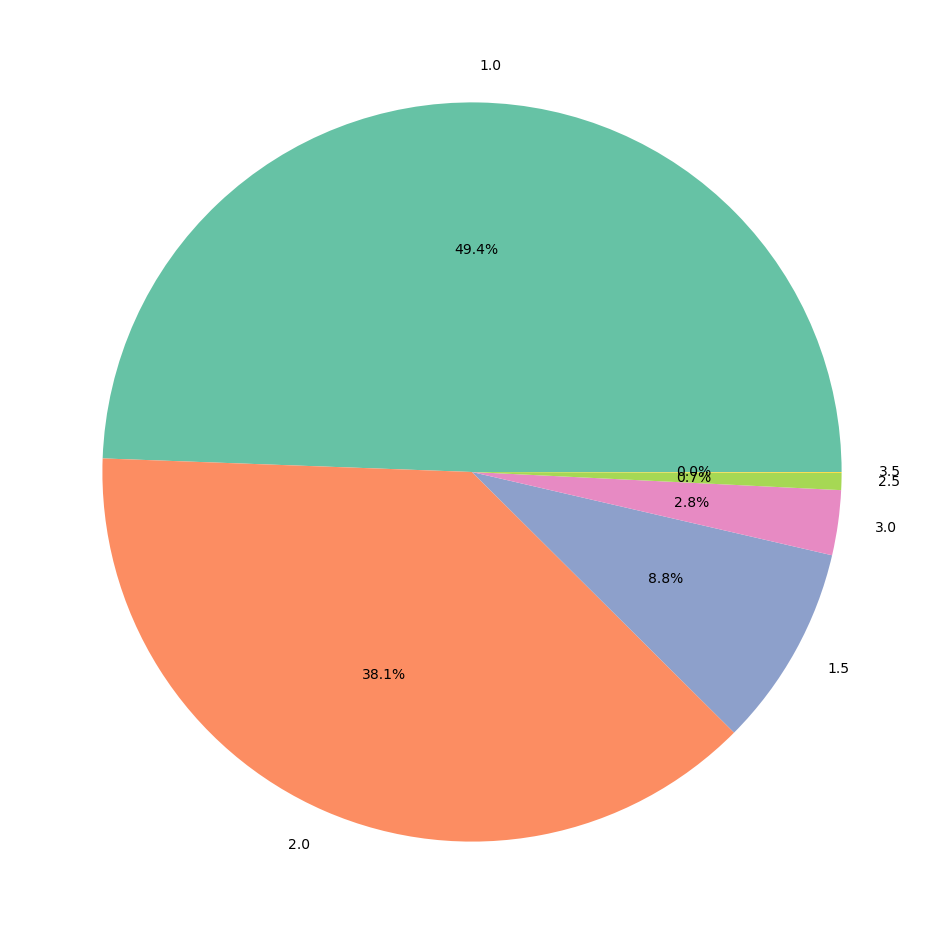

In [169]:
data = df['floors'].value_counts()
plt.figure(figsize=(12, 12))
clrs = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']
plt.pie(data, autopct='%1.1f%%', labels=data.index, colors=clrs)

;

Вывод: те кто не любит лестницы больше, т.е. одноэтажных домом 

### 2.3. Изучите распределение состояния домов



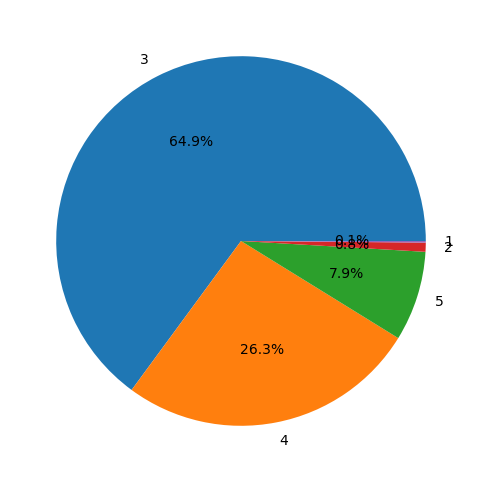

In [179]:
data = df['condition'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(data, autopct='%1.1f%%', labels=data.index);


In [ ]:
Вывод: не поняла. что за 3,4,5, может, оценки. Но отталкиваясь от этой теории, домов с состоянием 'so-so' больше (Видимо нужен ремонт)

## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с 
применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


In [181]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


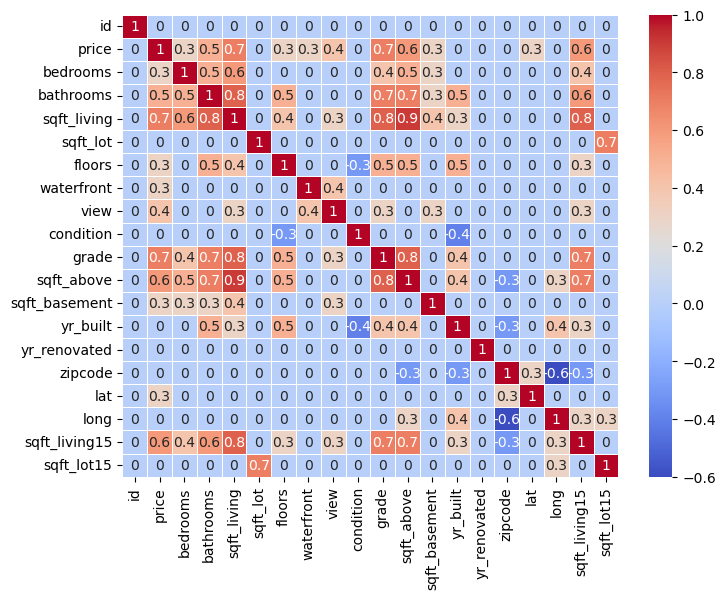

In [183]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

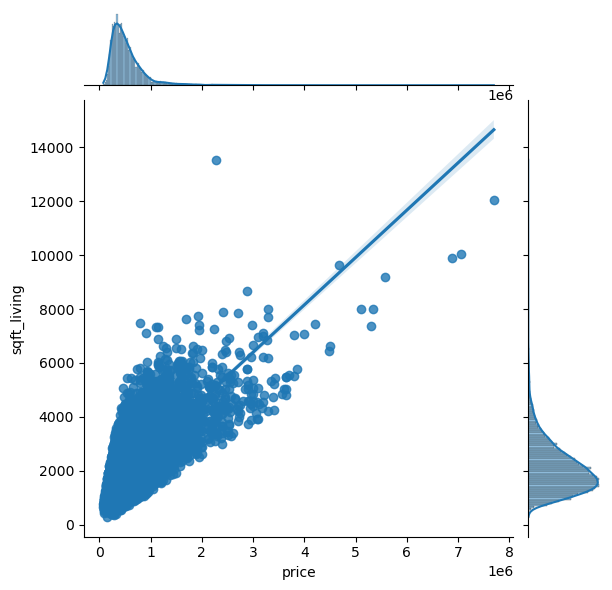

In [185]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

In [ ]:
Вывод: чем больше хоромы, тем дороже. И наоборот

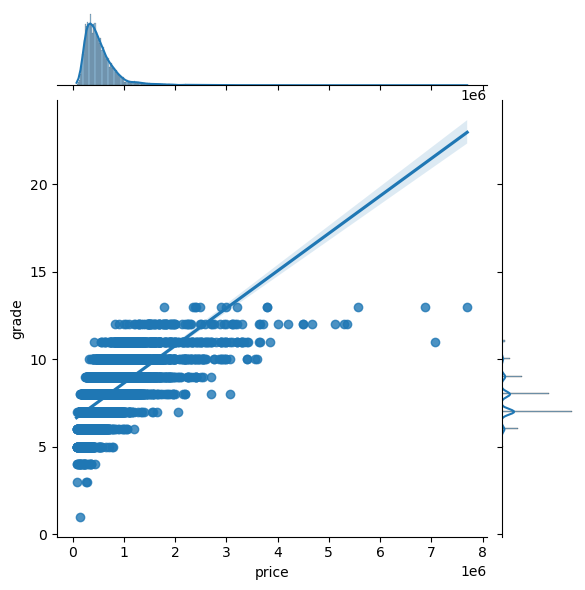

In [187]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg');

In [ ]:
Вывод: чем качественне сделан дом, тем он дороже. За качество нужно больше платить

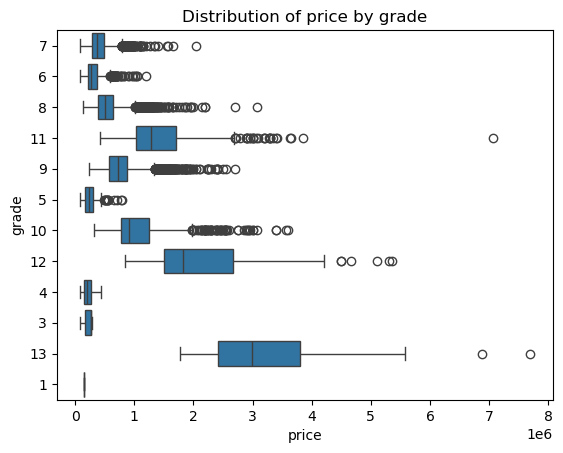

In [190]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('grade')
plt.title('Distribution of price by grade');

Вывод: в номинации *Самые дорогие хоромы* побеждает лот под номером 13 (какое-то подозрительное число))))

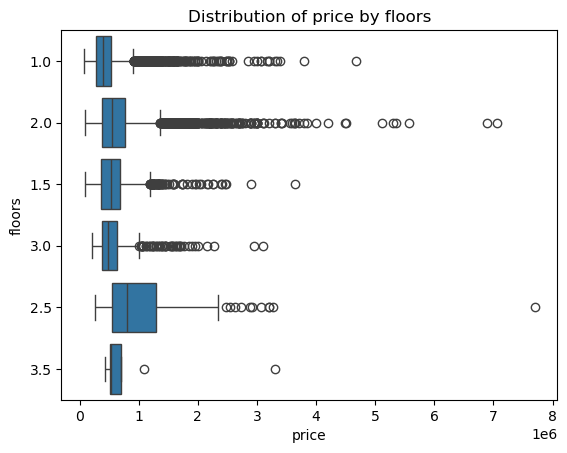

In [192]:
sns.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('floors')
plt.title('Distribution of price by floors');

Вывод: Самые дорогие дома имеют 2.5 этажей (2.5 это типа их не достроили??)

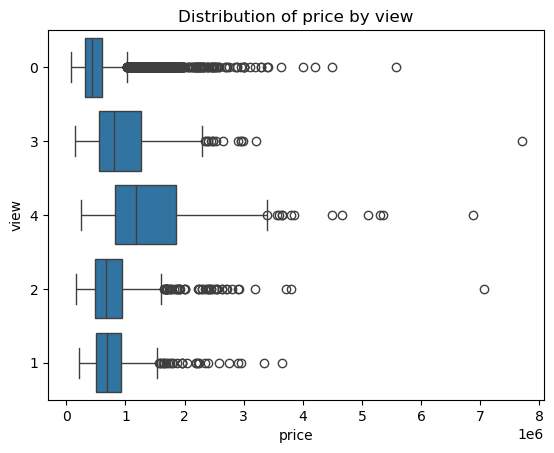

In [194]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('view')
plt.title('Distribution of price by view');

In [ ]:
Вывод: Наибольшую стоимость имеют дома с оценкой 4 (Либо у меня ошибка, либо это не поддается логике. Как 4 может стоить дороже 5)